In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import PIL
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
train=pd.read_csv("/content/drive/My Drive/Multi_Label_dataset.zip (Unzipped Files)/Multi_Label_dataset/train.csv")

In [3]:
train.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [4]:
train.describe()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
count,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000
mean,0.185139,0.119934,0.033637,0.060794,0.399779,0.162117,0.089881,0.498897,0.059829,0.064378,0.030880,0.069341,0.042046,0.013372,0.062586,0.001379,0.002895,0.000276,0.183899,0.055004,0.006341,0.030466,0.126551,0.019851,0.006893
std,0.388437,0.324907,0.180304,0.238969,0.489887,0.368584,0.286032,0.500033,0.237186,0.245442,0.173003,0.254051,0.200707,0.114869,0.242234,0.037106,0.053731,0.016603,0.387428,0.228004,0.079385,0.171877,0.332492,0.139498,0.082742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img(r"/content/drive/My Drive/Multi_Label_dataset.zip (Unzipped Files)/Multi_Label_dataset/Images/"+train['Id'][i]+'.jpg',target_size=(250,250,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 7254/7254 [11:38<00:00, 10.38it/s]


In [6]:
X.shape

(7254, 250, 250, 3)

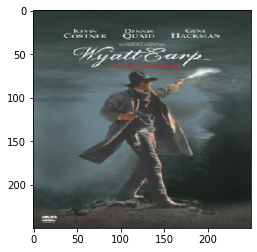

In [7]:
plt.imshow(X[1890])

In [8]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))
y.shape

(7254, 25)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)

In [14]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(250,250,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 246, 246, 16)      1216      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 123, 123, 16)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 123, 123, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 119, 119, 32)      12832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 55, 55, 64)       

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=64)

Train on 6528 samples, validate on 726 samples
Epoch 1/20
6528/6528 [==============================] - 125s 19ms/step - loss: 0.3869 - accuracy: 0.8392 - val_loss: 0.2756 - val_accuracy: 0.9051
Epoch 2/20
6528/6528 [==============================] - 124s 19ms/step - loss: 0.2782 - accuracy: 0.9020 - val_loss: 0.2571 - val_accuracy: 0.9068
Epoch 3/20
6528/6528 [==============================] - 121s 19ms/step - loss: 0.2660 - accuracy: 0.9049 - val_loss: 0.2536 - val_accuracy: 0.9051
Epoch 4/20
6528/6528 [==============================] - 120s 18ms/step - loss: 0.2608 - accuracy: 0.9057 - val_loss: 0.2467 - val_accuracy: 0.9051
Epoch 5/20
6528/6528 [==============================] - 124s 19ms/step - loss: 0.2576 - accuracy: 0.9065 - val_loss: 0.2471 - val_accuracy: 0.9051
Epoch 6/20
6528/6528 [==============================] - 123s 19ms/step - loss: 0.2549 - accuracy: 0.9068 - val_loss: 0.2454 - val_accuracy: 0.9068
Epoch 7/20
6528/6528 [==============================] - 128s 20ms/step 

In [33]:
img = image.load_img('/content/drive/My Drive/Multi_Label_dataset.zip (Unzipped Files)/Multi_Label_dataset/Test images/daenerys-targaryen-game-of-thrones-8-750x1334_578965-mm-90.jpg',target_size=(250,250,3))
img = image.img_to_array(img)
img = img/255

Drama (0.542)
Thriller (0.278)
Action (0.268)


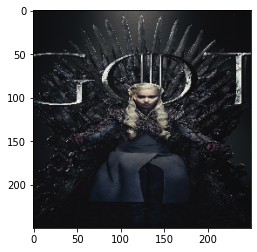

In [34]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,250,250,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [38]:
img = image.load_img('/content/drive/My Drive/Multi_Label_dataset.zip (Unzipped Files)/Multi_Label_dataset/Test images/MV5BMTllZDJhMTAtMjhmZi00MzBjLTljMmQtMmNlYTAwYmY0Y2Q0XkEyXkFqcGdeQXVyNDUzOTQ5MjY@._V1_UY1200_CR108,0,630,1200_AL_.jpg',target_size=(250,250,3))
img = image.img_to_array(img)
img = img/255

Comedy (0.634)
Drama (0.468)
Romance (0.256)


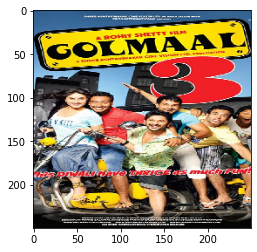

In [39]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,250,250,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [40]:
img = image.load_img('/content/drive/My Drive/Multi_Label_dataset.zip (Unzipped Files)/Multi_Label_dataset/Test images/53044759.webp',target_size=(250,250,3))
img = image.img_to_array(img)
img = img/255

Comedy (0.632)
Drama (0.469)
Romance (0.254)


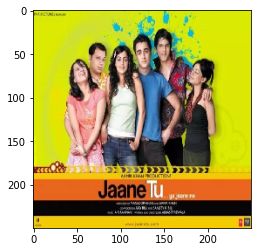

In [42]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,250,250,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [43]:
img = image.load_img('/content/drive/My Drive/Multi_Label_dataset.zip (Unzipped Files)/Multi_Label_dataset/Test images/8b6b3092c1814681cda727f656ddfcba.jpg',target_size=(250,250,3))
img = image.img_to_array(img)
img = img/255

Drama (0.563)
Action (0.242)
Thriller (0.215)


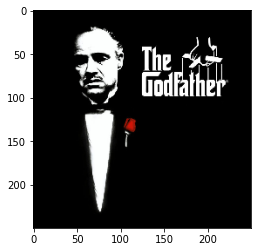

In [44]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,250,250,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [45]:
model.save('/content/drive/My Drive/Multi_Label_dataset.zip (Unzipped Files)/Multi_Label_dataset/model.h5')

In [46]:
img = image.load_img('/content/Raanjhanaa.jpg',target_size=(250,250,3))
img = image.img_to_array(img)
img = img/255

Drama (0.534)
Comedy (0.296)
Action (0.209)


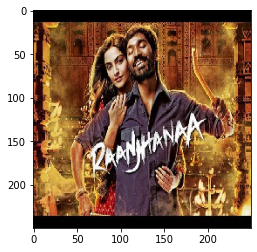

In [47]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,250,250,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [48]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [50]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [51]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 91.17%


**Great Job Amaya!**